In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns 
%matplotlib inline

In [74]:
from __future__ import print_function
from scipy import  stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [266]:
DataPath = os.getcwd()+'/data/pdataset.csv'
data = pd.read_csv(DataPath,index_col=0)

In [60]:
#index格式变化为时间
dji_origin.index = dji_origin.index.to_datetime()

/Users/xhxt2008/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  


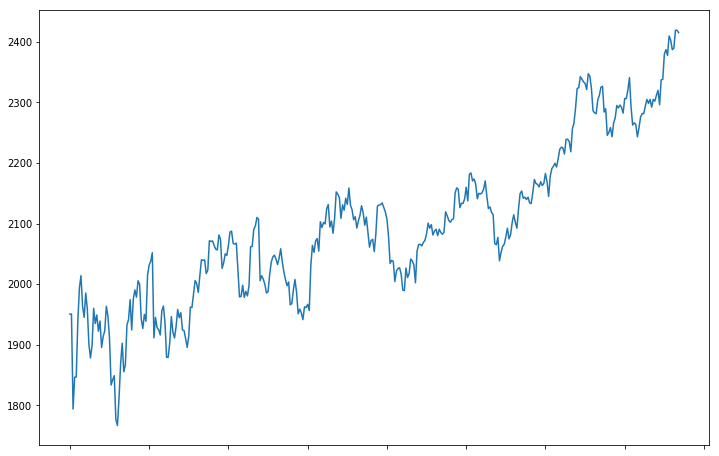

In [333]:
dji_origin = data.Close
dji_origin[15:400].plot(figsize=(12,8))
dji_origin = dji_origin[15:400]

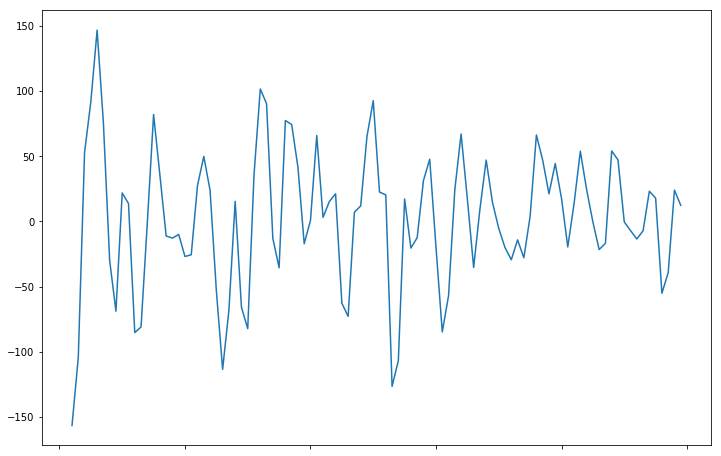

In [356]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dji_origin.diff(2)
diff1.head(100).plot(ax=ax1)

In [357]:
diff1 = diff1.dropna()

In [111]:
acf(dji,nlags=40)

array([ 1.        , -0.05293807, -0.0270916 ,  0.01329258, -0.01448215,
       -0.03706593, -0.0017093 , -0.01392639,  0.01840807, -0.00487967,
        0.02314958, -0.01703922,  0.03738663,  0.01198775, -0.01638282,
       -0.04305891,  0.0273124 ,  0.01128931, -0.0338481 ,  0.00123968,
        0.02318099, -0.02821288,  0.0029571 ,  0.00600058,  0.00852331,
       -0.02592453, -0.01246979,  0.02901882, -0.01378631,  0.01147162,
        0.00132476, -0.01097246, -0.0071912 , -0.01365627, -0.04260798,
       -0.00595457,  0.02584763,  0.00506432, -0.00434391,  0.01946072,
        0.00442354])

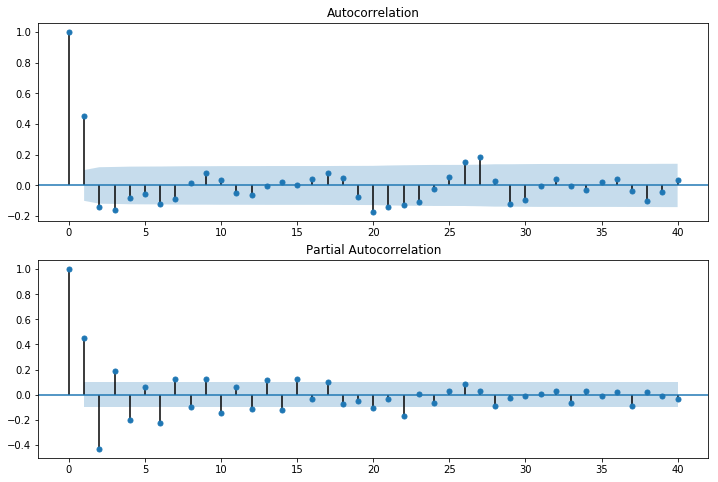

In [358]:
#dji= dji_log.diff(1)#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)

In [349]:
result_AR.fittedvalues,diff1

(1987-10-26     0.004343
 1987-10-27    76.277278
 1987-10-28   -83.237513
 1987-10-29   -25.616366
 1987-10-30   -92.112435
 1987-11-02   -48.724660
 1987-11-03   -13.344305
 1987-11-04    49.746679
 1987-11-05    17.305699
 1987-11-06   -35.997105
 1987-11-09    26.470754
 1987-11-10    55.009398
 1987-11-11    18.697774
 1987-11-12   -22.237721
 1987-11-13   -59.244902
 1987-11-16    23.480967
 1987-11-17   -14.100986
 1987-11-18    25.223984
 1987-11-19   -16.878047
 1987-11-20    41.653902
 1987-11-23   -18.321553
 1987-11-24    -9.958215
 1987-11-25   -40.246069
 1987-11-27    15.177135
 1987-11-30    35.056829
 1987-12-01    75.428488
 1987-12-02    -7.913301
 1987-12-03    -6.382210
 1987-12-04    71.436126
 1987-12-07    10.595278
                 ...    
 1989-03-20    49.597547
 1989-03-21    34.339881
 1989-03-22     1.784227
 1989-03-23     8.754467
 1989-03-27    27.385723
 1989-03-28    -7.840428
 1989-03-29   -12.243395
 1989-03-30    -1.391464
 1989-03-31     4.712799


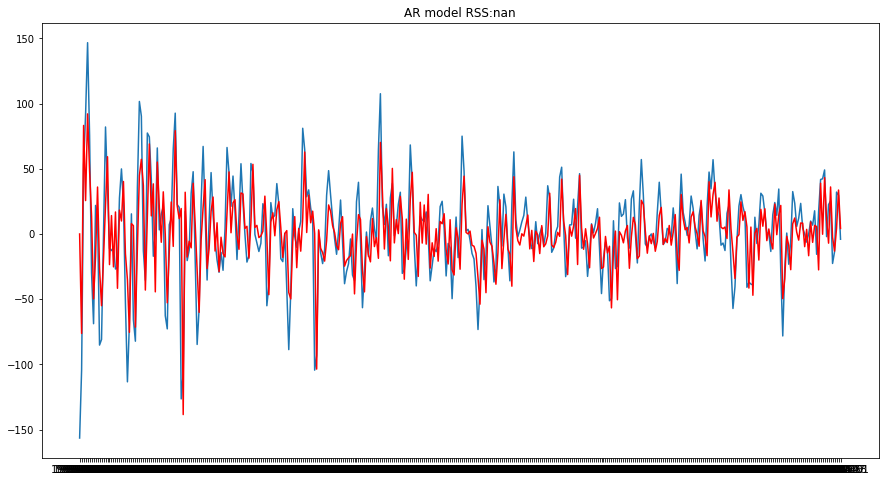

In [359]:
#AR
model = ARIMA(dji_origin, order=(2, 2, 2))
result_AR = model.fit(disp=-1)
plt.figure(figsize=(15,8))
plt.plot(diff1)
plt.plot(-result_AR.fittedvalues, color='red')
plt.title('AR model RSS:%.4f' % sum(result_AR.fittedvalues - dji_origin) ** 2)
plt.show()

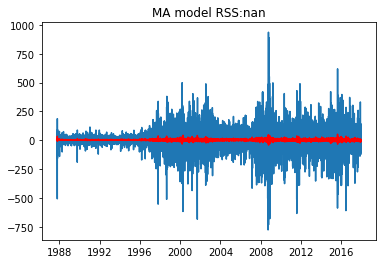

In [76]:
# MA model
model = ARIMA(dji_origin, order=(0, 1, 2))
result_MA = model.fit(disp=-1)
plt.plot(dji)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('MA model RSS:%.4f' % sum(result_MA.fittedvalues - dji) ** 2)
plt.show()

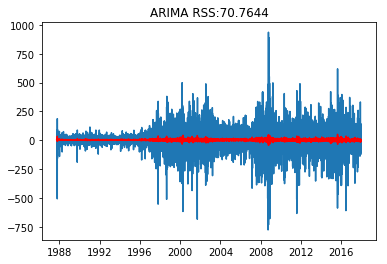

In [298]:
# ARIMA 将两个结合起来  效果更好
model = ARIMA(dji_origin, order=(2, 1, 0))
result_ARIMA = model.fit(disp=-1)
plt.plot(dji)
plt.plot(arma_mod5.fittedvalues, color='red')
plt.title('ARIMA RSS:%.4f' % sum(result_ARIMA.fittedvalues - dji[1:]) **2)
plt.show()

In [299]:
result_ARIMA.fittedvalues[-5:]

2017-12-22    0.949349
2017-12-26    3.012368
2017-12-27    4.414922
2017-12-28    1.844509
2017-12-29   -1.147567
dtype: float64

In [360]:
predictions_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dji_origin.ix[0], index=dji_origin.index)
predictions_ARIMA = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
plt.plot(dji_origin.head(100))
plt.plot(predictions_ARIMA.head(100))
plt.title('predictions_ARIMA RMSE: %.4f' % np.sqrt(sum((predictions_ARIMA - dji_origin) ** 2) / len(dji_origin)))


/Users/xhxt2008/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,u'predictions_ARIMA RMSE: nan')

Error in callback <function post_execute at 0x10c728758> (for post_execute):


ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

In [280]:
start2=pd.Timestamp("2017-12-30")
end2=pd.Timestamp("2018-1-10")

In [322]:
start =dji_origin.index[-7]
end = dji_origin.index[-1]

In [361]:
predict_sunspots = arma_mod5.predict()
print(predict_sunspots)
arma_mod5.fittedvalues[-5:]
# fig, ax = plt.subplots(figsize=(12, 8))
# ax = dta.ix['2001':].plot(ax=ax)
# predict_sunspots.plot(ax=ax)

1987-10-02     2.896123
1987-10-05     2.954677
1987-10-06     3.131355
1987-10-07     8.156900
1987-10-08     5.751234
1987-10-09     4.945257
1987-10-12     6.050398
1987-10-13     4.760030
1987-10-14     1.461482
1987-10-15     7.245216
1987-10-16     9.143208
1987-10-19    10.775908
1987-10-20    34.086908
1987-10-21    12.790325
1987-10-22   -10.111938
1987-10-23     1.762095
1987-10-26     5.443323
1987-10-27    11.682128
1987-10-28     4.975600
1987-10-29     1.547490
1987-10-30    -1.858649
1987-11-02    -2.611746
1987-11-03     0.365316
1987-11-04     5.281393
1987-11-05     5.650789
1987-11-06     1.499989
1987-11-09     3.375621
1987-11-10     7.139727
1987-11-11     6.107004
1987-11-12     2.653982
                ...    
2017-11-16    11.581774
2017-11-17    -2.917779
2017-11-20     2.992577
2017-11-21     2.210958
2017-11-22    -7.771169
2017-11-24     1.855311
2017-11-27     3.344104
2017-11-28     0.944817
2017-11-29   -11.496923
2017-11-30   -10.199008
2017-12-01   -18

2017-12-22    0.949349
2017-12-26    3.012368
2017-12-27    4.414922
2017-12-28    1.844509
2017-12-29   -1.147567
dtype: float64

In [290]:
dji_origin[-1]

24719.2207

In [284]:
arma_mod5.forecast(1)[0]

array([24726.91673229])

In [295]:
arma_mod1 = result_ARIMA
print(arma_mod1.aic,arma_mod1.bic,arma_mod1.hqic)
arma_mod2 = sm.tsa.ARIMA(dji_origin,(1,1,0)).fit()
print(arma_mod2.aic,arma_mod2.bic,arma_mod2.hqic)
arma_mod3 = sm.tsa.ARIMA(dji_origin,(0,1,1)).fit()
print(arma_mod3.aic,arma_mod3.bic,arma_mod3.hqic)
arma_mod4 = sm.tsa.ARIMA(dji_origin,(1,1,1)).fit()
print(arma_mod4.aic,arma_mod4.bic,arma_mod4.hqic)
arma_mod5 = sm.tsa.ARIMA(dji_origin,(2,1,0)).fit()
print(arma_mod5.aic,arma_mod5.bic,arma_mod5.hqic)
arma_mod6 = sm.tsa.ARIMA(dji_origin,(2,1,2)).fit()
print(arma_mod6.aic,arma_mod6.bic,arma_mod6.hqic)
arma_mod7 = sm.tsa.ARIMA(dji_origin,(3,1,3)).fit()
print(arma_mod7.aic,arma_mod7.bic,arma_mod7.hqic)

92321.2086922 92348.96491802024 92330.7321325636
92326.0611471 92346.87831644998 92333.2037273575
92324.7957445 92345.61291380545 92331.93832471297
92321.353909 92349.11013477697 92330.87734932033
92321.2086922 92348.96491802024 92330.7321325636
92322.996901 92364.63123963642 92337.28206145146
92300.3975594 92355.91001098654 92319.44444007328


In [180]:
arma_mod7 = sm.tsa.ARIMA(dji_origin,(3,2,3)).fit()
print(arma_mod7.aic,arma_mod7.bic,arma_mod7.hqic)

92304.3248228 92359.8362249757 92323.37146866057


/Users/xhxt2008/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/xhxt2008/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [70]:
lag_acf = acf(dji, nlags=20)
lag_pacf = pacf(dji, nlags=20, method='ols')

In [72]:
lag_pacf

array([ 1.        , -0.05294765, -0.0299803 ,  0.01027258, -0.01407177,
       -0.03810344, -0.00675959, -0.01627076,  0.01720377, -0.00486829,
        0.02255595, -0.01612515,  0.03669954,  0.01578779, -0.01216019,
       -0.04331535,  0.02150413,  0.01587999, -0.03084614, -0.00264966,
        0.01710379])

In [48]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]

In [50]:
dta.shape

(90,)

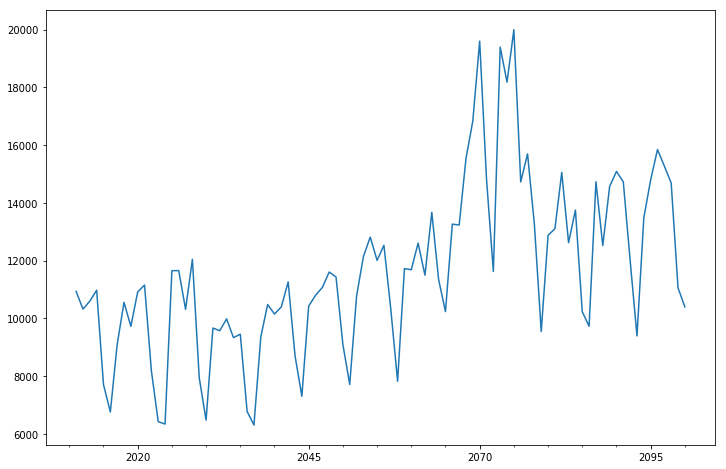

In [51]:
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2011','2100'))
dta.plot(figsize=(12,8))

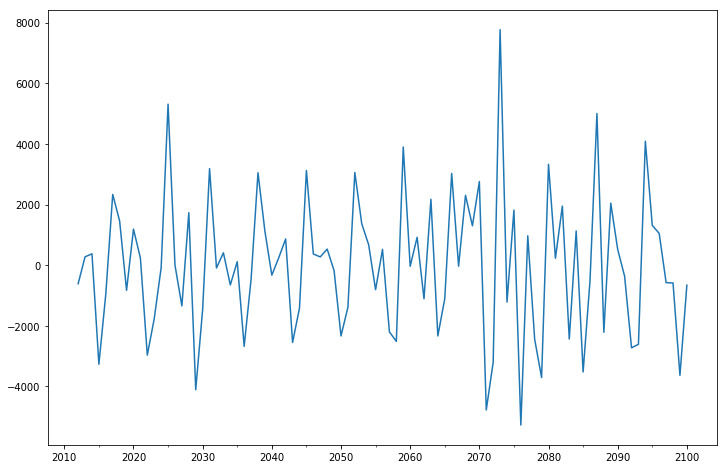

In [52]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

In [56]:
dta= dta.diff(1)
dta.isnull().sum()

4